In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re

In [2]:
data=pd.read_csv("..\datasets\Reviews-Sentiment-Analysis\linkedin-reviews.csv")

In [3]:
data.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


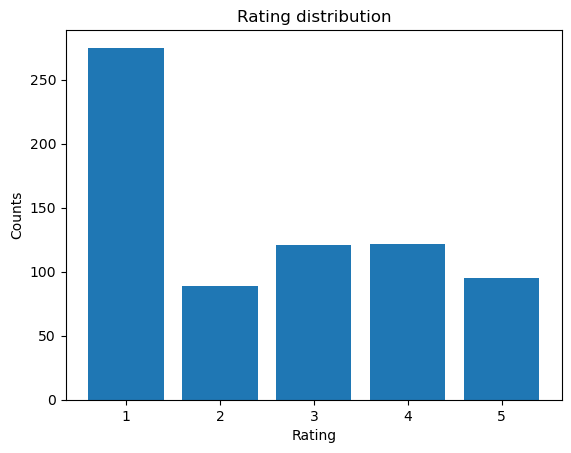

In [4]:
rating_counts=data.Rating.value_counts()
plt.bar(rating_counts.index,rating_counts.values)
plt.xlabel("Rating")
plt.ylabel('Counts')
plt.title('Rating distribution')
plt.show()

In [5]:
data['review_length']=data['Review'].apply(lambda x : len(x))

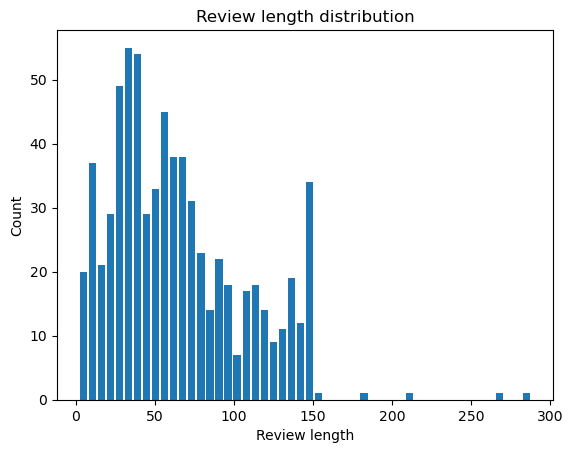

In [6]:
review_length=data['review_length'].value_counts().sort_index()
plt.hist(data['review_length'],bins=50,rwidth=0.8)
plt.xlabel("Review length")
plt.ylabel("Count")
plt.title("Review length distribution")
plt.show()

In [7]:
nltk.download('stopwords')
stopword=set(stopwords.words('english'))
stemmer=nltk.SnowballStemmer('english')
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data['Review_clean']=data['Review'].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shich\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
data.head()

,Review,Rating,review_length,Review_clean
0,Does absolutely nothing for a LinkedIn beginne...,1,80,absolut noth linkedin beginn forc close useles...
1,Force close(galaxy tab),1,23,forc closegalaxi tab
2,Slow and it tries to upload your contacts with...,1,61,slow tri upload contact without ask wtf
3,Add ability to customize the profile and move ...,4,90,add abil custom profil move sd card app star one
4,"Good app, but it's a pain that it's not possib...",4,133,good app pain possibl see sent messag kind con...


In [9]:
nltk.download('vader_lexicon')
sentiments=SentimentIntensityAnalyzer()
data['Positive']=[sentiments.polarity_scores(i)['pos'] for i in data['Review_clean']]
data['Negative']=[sentiments.polarity_scores(i)['neg'] for i in data['Review_clean']]
data['Neutral']=[sentiments.polarity_scores(i)['neu'] for i in data['Review_clean']]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shich\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
data.head()

,Review,Rating,review_length,Review_clean,Positive,Negative,Neutral
0,Does absolutely nothing for a LinkedIn beginne...,1,80,absolut noth linkedin beginn forc close useles...,0.000,0.286,0.714
1,Force close(galaxy tab),1,23,forc closegalaxi tab,0.000,0.000,1.000
2,Slow and it tries to upload your contacts with...,1,61,slow tri upload contact without ask wtf,0.339,0.000,0.661
3,Add ability to customize the profile and move ...,4,90,add abil custom profil move sd card app star one,0.000,0.000,1.000
4,"Good app, but it's a pain that it's not possib...",4,133,good app pain possibl see sent messag kind con...,0.358,0.187,0.455


In [11]:
def sentiment_cal(row):
    if row['Positive']>row['Neutral'] and row['Positive']>row['Negative']:
        return 'Positive'
    if row['Negative']>row['Neutral'] and row['Negative']>row['Positive']:
        return 'Negative'
    return 'Neutral'
data['Sentiment']=data.apply(sentiment_cal,axis=1)

<Axes: xlabel='Sentiment'>

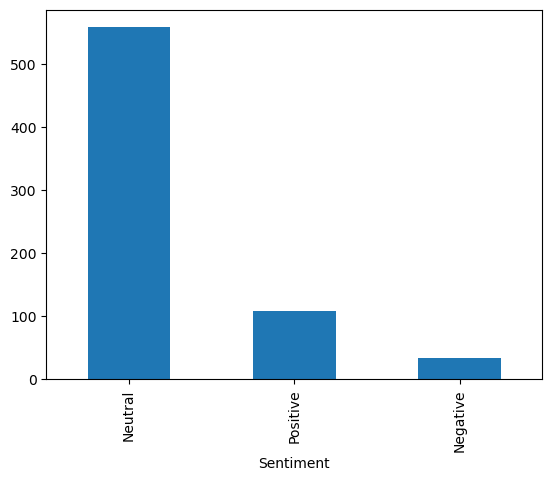

In [12]:
data['Sentiment'].value_counts().plot(kind='bar')

In [13]:
rating_sentiment=data.groupby(['Rating','Sentiment'])['Review'].count().reset_index()
rating_sentiment2=rating_sentiment.pivot(index='Rating',columns='Sentiment',values='Review')

<Axes: xlabel='Rating'>

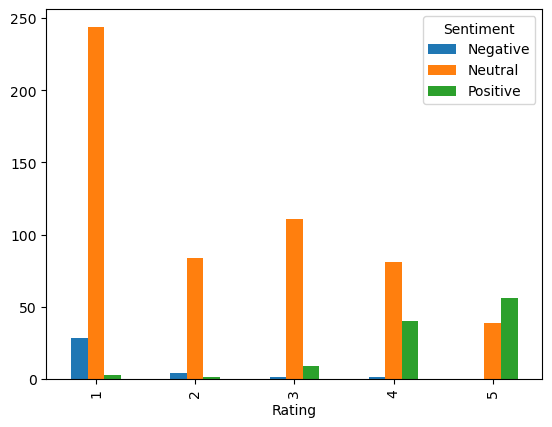

In [14]:
rating_sentiment2.plot(kind='bar')

<Axes: xlabel='Rating', ylabel='Review'>

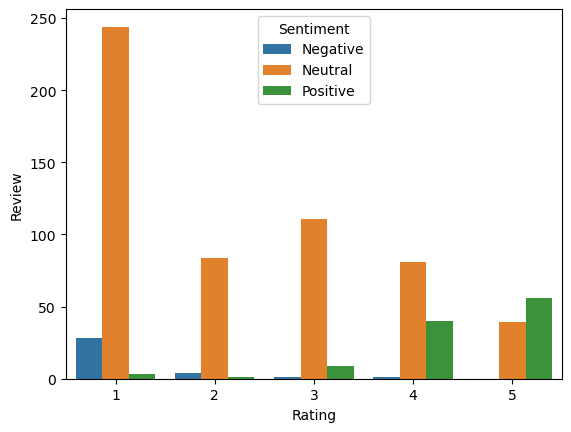

In [15]:
sns.barplot(rating_sentiment,x='Rating',y='Review',hue='Sentiment')

In [17]:
#the negative review threthold shoud be lower
def sentiment_cal(row):
    if row['Negative']>=0.2:
        return 'Negative'
    elif row['Neutral']>=0.5:
        return 'Neutral'
    else:
        return 'Positive'
data['Sentiment']=data.apply(sentiment_cal,axis=1)

<Axes: xlabel='Rating', ylabel='Review'>

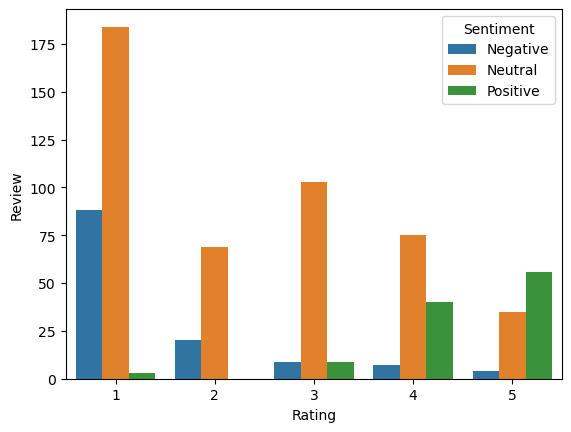

In [18]:
rating_sentiment=data.groupby(['Rating','Sentiment'])['Review'].count().reset_index()
rating_sentiment2=rating_sentiment.pivot(index='Rating',columns='Sentiment',values='Review')
sns.barplot(rating_sentiment,x='Rating',y='Review',hue='Sentiment')

#this makes more sense now